# TP: Machine Learning

## TP4: AutoML

In previous TP, we have learned to use machine learning for different kind of tasks, from regression to clustering through classification. In this TP, we are going to use the earned knowledge on new datasets for regression and classification.

we are going to use 2 new datasets in this TP. First one is california housing, whose target variable is the value of houses in california, expressed in hundred of thousand of dollars. For each house, a set of 9 features is available. There is a total of 20 060 data.

Second one is MNIST, a very popular dataset for handwritten recognition and image classification. The original dataset is made of 60 000 training images of shape 28x28 of handwritten digits from 0 to 9, and 10 000 images for test dataset. For computaional time, we will work on a given random subset of MNIST made of 6000 images in train and 1000 images in test.  

**Objectives :**
- Apply your knowledge on new datasets
- Tune models hyperparameters and explore metrics
- Apply principal components analysis and understand its effects on both dataset
- Understand and use Cross-Validation
- Use AutoML to find interesting models

### STEP 1 : Getting started with new datasets

#### Substep 1 : Regression

In first part of step 1, wewill work on the regression problem with the dataset california housing.

In [ ]:
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import normalize

X, y = fetch_california_housing(return_X_y = True)
X = normalize(X)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive



Apply [Stochastic Gradient Descent](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html#sklearn.linear_model.SGDRegressor) and [SVR](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html) methods and cross validate your results using 5 folders. For this, we can either use the function [cross_val_score](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html#sklearn.model_selection.cross_val_score)(or any other method for cross validation in sklearn) or either compute yourself the cross validation. According to a relevant metric optimize both methods. For SGD we will optimize the value of alpha for both L2 and L1 penalty score. For SVR, we will optimize the kernel. Be careful with the metric if we use cross_val_score, the returned values are often negative.

In [ ]:
import numpy as np
from sklearn.linear_model import SGDRegressor
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score

In [ ]:
print('Optimization alpha for l2 :')
for i in range(6):
    x = 10**-i
    model1 = SGDRegressor(alpha = x)
    score1 = cross_val_score(model1, X, y, scoring='neg_mean_squared_error')
    print('alpha = {} : score = {}'.format(x,score1.mean()))

Optimization alpha for l2 :
alpha = 1 : score = -1.3864506777739376
alpha = 0.1 : score = -1.3645056301336533
alpha = 0.01 : score = -1.3722593746473244
alpha = 0.001 : score = -1.3731860477007811
alpha = 0.0001 : score = -1.3657369763221772
alpha = 1e-05 : score = -1.3673712201580996


We see the optimize alpha for l2 to minimize error is alpha = 0.0001 because it is the value which is the closest to zeros.

In [ ]:
print('Optimization alpha for l1 :')
for i in range(6):
    x = 10**-i
    model1 = SGDRegressor(penalty='l1', alpha = x)
    score1 = cross_val_score(model1, X, y, scoring='neg_mean_squared_error')
    print('alpha = {} : score = {}'.format(x,score1.mean()))

Optimization alpha for l1 :
alpha = 1 : score = -1.367244243376764
alpha = 0.1 : score = -1.3650658932617232
alpha = 0.01 : score = -1.376241284507308
alpha = 0.001 : score = -1.3672538689722962
alpha = 0.0001 : score = -1.372603181250247
alpha = 1e-05 : score = -1.3696663614473532


We see the optimize kernel for to minimize error is kernel = poly because it is the value which is the closest to zeros.

In [ ]:
model1 = SGDRegressor(alpha = 0.0001)
model2 = SGDRegressor(penalty='l1', alpha = 0.1)
model3 = SVR(kernel='poly')


score1 = cross_val_score(model1, X, y, scoring='neg_mean_squared_error')
score2 = cross_val_score(model2, X, y, scoring='neg_mean_squared_error')
score3 = cross_val_score(model3, X, y, scoring='neg_mean_squared_error')

In [ ]:
print(
    'score of SGD with l2 and alpha = 0.0001 optimization : {}\nscore of SGD with l1 and alpha = 0.1 optimization : {}\nscore of polynomial SVR : {}'
    .format(score1.mean(), score2.mean(), score3.mean())
    )

score of SGD with l2 and alpha = 0.0001 optimization : -1.3657050048886163
score of SGD with l1 and alpha = 0.1 optimization : -1.3666857865792283
score of polynomial SVR : -1.198046329410784


According to our metric, the best result is SVR method with polynomial kernel.

it is interesting to use cross validation if the dataset is not split into training and test set.


Transform your data according to [principal component analysis](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html), and optimize the number of components according to the same metric than previously for both models.

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
for i in range(1,7):
    pca = PCA(n_components=i)
    X_PCA = pca.fit_transform(X)
    score1 = cross_val_score(model1, X_PCA, y, scoring='neg_mean_squared_error')
    print('n_component : {} | score : {}'.format(i, score1.mean()))

n_component : 1 | score : -1.3670707886777458
n_component : 2 | score : -1.3700479496304698
n_component : 3 | score : -1.3649455882288706
n_component : 4 | score : -1.3735337826275695
n_component : 5 | score : -1.3770545366191478
n_component : 6 | score : -1.3678590937805895


For SDGRegressor model with l2 penalty the most relevant value is n_component = 3

In [ ]:
for i in range(1,7):
    pca = PCA(n_components=i)
    X_PCA = pca.fit_transform(X)
    score2 = cross_val_score(model2, X_PCA, y, scoring='neg_mean_squared_error')
    print('n_component : {} | score : {}'.format(i, score2.mean()))

n_component : 1 | score : -1.3693260908733538
n_component : 2 | score : -1.365179968185556
n_component : 3 | score : -1.3712876564795198
n_component : 4 | score : -1.3658487381381654
n_component : 5 | score : -1.3680607916749332
n_component : 6 | score : -1.3678151290154001


For SDGRegressor model with l2 penalty the most relevant value is n_component = 3

In [ ]:
for i in range(1,7):
    pca = PCA(n_components=i)
    X_PCA = pca.fit_transform(X)
    score3 = cross_val_score(model3, X_PCA, y, scoring='neg_mean_squared_error')
    print('n_component : {} | score : {}'.format(i, score3.mean()))

n_component : 1 | score : -1.4425693266200867
n_component : 2 | score : -1.4439209134486575
n_component : 3 | score : -1.4456464278417336
n_component : 4 | score : -1.4534873128052976
n_component : 5 | score : -1.4867007980110984
n_component : 6 | score : -1.5030059981625277


For SGD model the most relevant value is n_component = 1

In [ ]:
pca = PCA(n_components=3)
X_PCA = pca.fit_transform(X)
score1_PCA = cross_val_score(model1, X_PCA, y, scoring='neg_mean_squared_error')
score2_PCA = cross_val_score(model2, X_PCA, y, scoring='neg_mean_squared_error')

pca = PCA(n_components=1)
X_PCA = pca.fit_transform(X)
score3_PCA = cross_val_score(model3, X_PCA, y, scoring='neg_mean_squared_error')

score1 = cross_val_score(model1, X, y, scoring='neg_mean_squared_error')
score2 = cross_val_score(model2, X, y, scoring='neg_mean_squared_error')
score3 = cross_val_score(model3, X, y, scoring='neg_mean_squared_error')

print(
    'SGD l2 with PCA : {} | SGD l2 without PCA : {}\nSGD l1 with PCA : {} | SGD l1 without PCA : {}\nSVR with PCA : {} | SVR l2 without PCA : {}'
    .format(score1_PCA.mean(), score1.mean(), score2_PCA.mean(), score2.mean(), score3_PCA.mean(), score3.mean())
    )

SGD l2 with PCA : -1.373913776879563 | SGD l2 without PCA : -1.3713929147690074
SGD l1 with PCA : -1.3741732859453752 | SGD l1 without PCA : -1.3675575373711166
SVR with PCA : -1.4425986205887806 | SVR l2 without PCA : -1.198046329410784


Simplifies the complexity in high-dimensional data while retaining trends and patterns. It does this by transforming the data into fewer dimensions, which act as summaries of features. It is not relevant here.

In [ ]:
import pickle
with open("/content/drive/MyDrive/Colab Notebooks/Machine learning/TP/mnist.pkl", "rb") as f:
    ((X_train, y_train), (X_test, y_test)) = pickle.load(f)


Compute classification on those images using a [KNN classifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier) and an [Adaboost classifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html). For each classifier, optimize the parameters according to a relevant metric. For the KNN classifier, we will optimize the number of neighbor while for the Adaboost classifier, we will optimize the base estimator along with the number of estimators (for the basis estimator, limit yourself to different depth of decision tree classifier).

Also, for each model, compute the confusion matrix.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier

knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

ada = AdaBoostClassifier()
ada.fit(X_train,y_train)

AdaBoostClassifier()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

def ConfusionMatrix(model, X, y):
    #Get the confusion matrix
    cf_matrix = confusion_matrix(model.predict(X), y)

    plt.figure(figsize=(8,8))
    ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

    ax.set_title('Seaborn Confusion Matrix with labels\n\n');
    ax.set_xlabel('\nPredicted')
    ax.set_ylabel('Actual');

    ## Ticket labels - List must be in alphabetical order
    ax.xaxis.set_ticklabels(y)
    ax.yaxis.set_ticklabels(y)

    ## Display the visualization of the Confusion Matrix.
    plt.xticks(rotation = 90)
    plt.yticks(rotation = 0)
    plt.show()

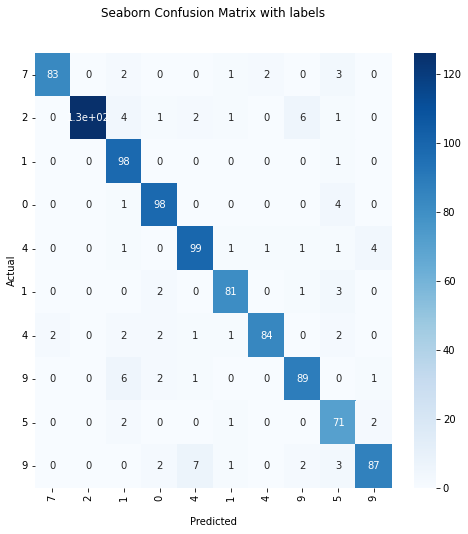

In [ ]:
ConfusionMatrix(knn, X_test, y_test)

In [ ]:
print('n_neighbors optimization for knn:')
for i in range(1,10):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    score = knn.score(X_test,y_test)
    print('n_neighbors : {} | score : {}'.format(i, score))


n_neighbors optimization for knn:
n_neighbors : 1 | loss : 0.904
n_neighbors : 2 | loss : 0.9
n_neighbors : 3 | loss : 0.913
n_neighbors : 4 | loss : 0.913
n_neighbors : 5 | loss : 0.916
n_neighbors : 6 | loss : 0.913
n_neighbors : 7 | loss : 0.914
n_neighbors : 8 | loss : 0.913
n_neighbors : 9 | loss : 0.909


n_neighbors optimization for knn is 5

In [ ]:
import sklearn

In [ ]:
print('max_depth optimization for Ada:')
for i in range(1,10):
    dtc = sklearn.tree.DecisionTreeClassifier(max_depth = 2*i)
    ada = AdaBoostClassifier(base_estimator = dtc)
    ada.fit(X_train,y_train)
    score = ada.score(X_test,y_test)
    print('max_depth : {} | score : {}'.format(2*i, score))

max_depth optimization for Ada:
max_depth : 2 | loss : 0.556
max_depth : 4 | loss : 0.71
max_depth : 6 | loss : 0.814
max_depth : 8 | loss : 0.885
max_depth : 10 | loss : 0.892
max_depth : 12 | loss : 0.913
max_depth : 14 | loss : 0.921
max_depth : 16 | loss : 0.925
max_depth : 18 | loss : 0.921


In [ ]:
print('n_estimator optimization for Ada:')
for i in range(1,10):
    dtc = sklearn.tree.DecisionTreeClassifier(max_depth = 16)
    ada = AdaBoostClassifier(base_estimator = dtc, n_estimators = 4*i)
    ada.fit(X_train,y_train)
    score = ada.score(X_test,y_test)
    print('max_depth : {} | score : {}'.format(4*i, score))

n_estimator optimization for Ada:
max_depth : 4 | score : 0.805
max_depth : 8 | score : 0.862
max_depth : 12 | score : 0.885
max_depth : 16 | score : 0.899
max_depth : 20 | score : 0.894
max_depth : 24 | score : 0.908
max_depth : 28 | score : 0.908
max_depth : 32 | score : 0.908
max_depth : 36 | score : 0.914


To optimize the score n_estimators optimization for Ada is 50 (Default) and max_depth is 16

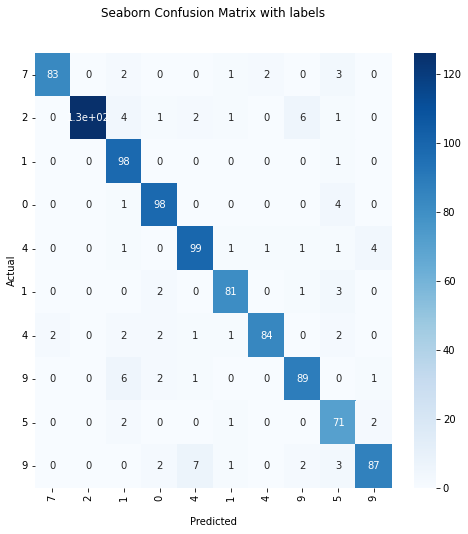

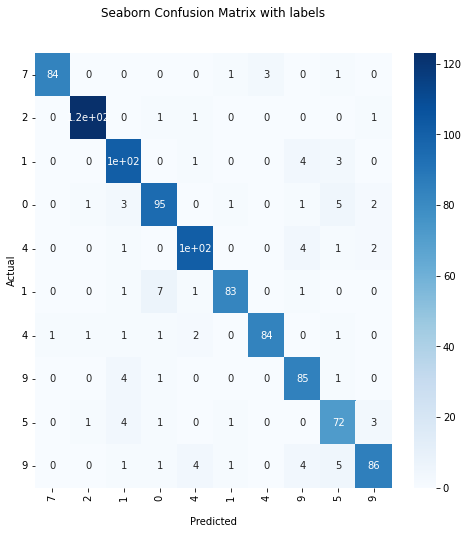

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train,y_train)

ada = AdaBoostClassifier(base_estimator = dtc)
ada.fit(X_train,y_train)

ConfusionMatrix(knn, X_test, y_test)
ConfusionMatrix(ada, X_test, y_test)

knn obtain the best result

According to the confusion matrix, the numbe 2 is the easiest class to classify and the worst to classify is the number 5. The class 9 is the most confused whith each other

For the Adaboost classifier, explore other classifier as base estimators. What are the limitations about those estimators ?

Transform your data according to principal component analysis, and optimize the number of components according to the same metric than previously for each classifier.

Once again, compute the confusion matrix for each model.

In [ ]:
print('n_component optimization for knn:')
for i in range(1,10):
    pca = PCA(n_components=2*i)
    X_train_new = pca.fit_transform(X_train,y_train)
    X_test_new = pca.fit_transform(X_test,y_test)
    knn.fit(X_train_new,y_train)
    score = knn.score(X_test_new,y_test)
    print('n_component : {} | score : {}'.format(2*i, score))

n_component optimization for knn:
n_component : 2 | score : 0.078
n_component : 4 | score : 0.076
n_component : 6 | score : 0.123
n_component : 8 | score : 0.116
n_component : 10 | score : 0.119
n_component : 12 | score : 0.104
n_component : 14 | score : 0.104
n_component : 16 | score : 0.096
n_component : 18 | score : 0.093


In [ ]:
print('n_component optimization for ada:')
for i in range(1,10):
    pca = PCA(n_components=2*i)
    X_train_new = pca.fit_transform(X_train,y_train)
    X_test_new = pca.fit_transform(X_test,y_test)
    ada.fit(X_train_new,y_train)
    score = ada.score(X_test_new,y_test)
    print('n_component : {} | score : {}'.format(2*i, score))

n_component optimization for ada:
n_component : 2 | score : 0.092
n_component : 4 | score : 0.057
n_component : 6 | score : 0.098
n_component : 8 | score : 0.101
n_component : 10 | score : 0.091
n_component : 12 | score : 0.087
n_component : 14 | score : 0.085
n_component : 16 | score : 0.089
n_component : 18 | score : 0.085


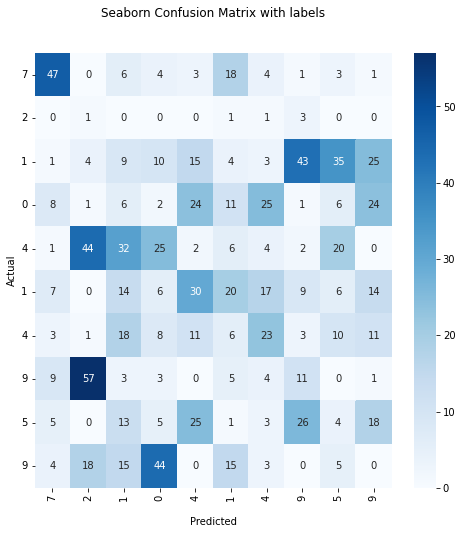

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components= 10)
X_train_new = pca.fit_transform(X_train,y_train)
X_test_new = pca.fit_transform(X_test,y_test)

knn.fit(X_train_new,y_train)
ConfusionMatrix(knn, X_test_new, y_test)

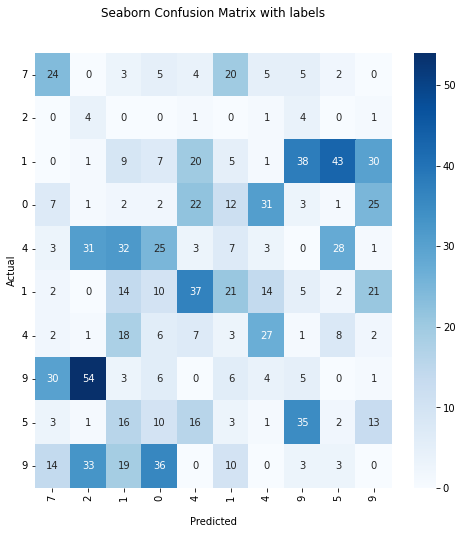

In [ ]:
pca = PCA(n_components= 8)
X_train_new = pca.fit_transform(X_train,y_train)
X_test_new = pca.fit_transform(X_test,y_test)
ada.fit(X_train_new,y_train)
ConfusionMatrix(ada, X_test_new, y_test)

PCA here is not relevant, the score decrease.

### Step 2 : AutoML

In this second section, we discuss on the utilisation of AutoMl tools, such as auto-sklearn

In [ ]:
X, y = fetch_california_housing(return_X_y = True)

In [ ]:
!pip install --force-reinstall scipy==1.6
!pip install --force-reinstall auto-sklearn==0.15

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 27.4 MB 1.5 MB/s 
     |████████████████████████████████| 15.7 MB 32.2 MB/s 
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.6
    Uninstalling numpy-1.21.6:
      Successfully uninstalled numpy-1.21.6
  Attempting uninstall: scipy
    Found existing installation: scipy 1.7.3
    Uninstalling scipy-1.7.3:
      Successfully uninstalled scipy-1.7.3


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 6.5 MB 1.9 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 837 kB 49.4 MB/s 
     |████████████████████████████████| 260 kB 67.9 MB/s 
  Using cached setuptools-65.5.1-py3-none-any.whl (1.2 MB)
     |████████████████████████████████| 596 kB 47.3 MB/s 
     |████████████████████████████████| 4.3 MB 37.9 MB/s 
     |████████████████████████████████| 4.4 MB 48.6 MB/s 
     |████████████████████████████████| 297 kB 71.5 MB/s 
  Using cached numpy-1.21.6-cp37-cp37m-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (15.7 MB)
     |████████████████████████████████| 38.1 MB 1.3 MB/s 
     |████████████████████████████████| 1.1 MB 31.0 MB/s 
     |████████████████████████████████| 22.3 MB 1.4 MB/s 
     |████████████████████████████████| 1

In [ ]:
import autosklearn.regression
import sklearn.model_selection
import sklearn.datasets
import os, shutil
from sklearn.metrics import mean_squared_error, mean_absolute_error

X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size = 0.33)


automl = autosklearn.regression.AutoSklearnRegressor(
    include = {'regressor': ["libsvm_svr", "sgd"]},
    time_left_for_this_task=120,
    per_run_time_limit=30,
    tmp_folder='/tmp/california_housing_tmp',
)
automl.fit(X_train, y_train, dataset_name='California_Housing')

print(automl.leaderboard())

y_pred = automl.predict(X_test, y_test)
print("MSE = ", mean_squared_error(y_test, y_pred))
print("MRE = ", mean_absolute_error(y_test, y_pred))

[WARNING] [2022-11-12 11:53:30,524:Client-AutoMLSMBO(1)::California_Housing] Configuration 39 not found
[WARNING] [2022-11-12 11:53:30,524:Client-AutoMLSMBO(1)::California_Housing] Configuration 201 not found
[WARNING] [2022-11-12 11:53:30,524:Client-AutoMLSMBO(1)::California_Housing] Configuration 207 not found
[WARNING] [2022-11-12 11:53:30,524:Client-AutoMLSMBO(1)::California_Housing] Configuration 107 not found
[WARNING] [2022-11-12 11:53:30,524:Client-AutoMLSMBO(1)::California_Housing] Configuration 31 not found
[WARNING] [2022-11-12 11:53:30,524:Client-AutoMLSMBO(1)::California_Housing] Configuration 279 not found
[WARNING] [2022-11-12 11:53:30,524:Client-AutoMLSMBO(1)::California_Housing] Configuration 89 not found
[WARNING] [2022-11-12 11:53:30,524:Client-AutoMLSMBO(1)::California_Housing] Configuration 102 not found
[WARNING] [2022-11-12 11:53:30,524:Client-AutoMLSMBO(1)::California_Housing] Configuration 54 not found
[WARNING] [2022-11-12 11:53:30,524:Client-AutoMLSMBO(1)::Ca

In [ ]:
from pprint import pprint
pprint(automl.show_models(), indent=4)

{   2: {   'cost': 0.28314804418857875,
           'data_preprocessor': <autosklearn.pipeline.components.data_preprocessing.DataPreprocessorChoice object at 0x7fbe98d714d0>,
           'ensemble_weight': 1.0,
           'feature_preprocessor': <autosklearn.pipeline.components.feature_preprocessing.FeaturePreprocessorChoice object at 0x7fbe98b47f10>,
           'model_id': 2,
           'rank': 1,
           'regressor': <autosklearn.pipeline.components.regression.RegressorChoice object at 0x7fbe98c102d0>,
           'sklearn_regressor': SVR(cache_size=1869.09375, gamma=0.1, verbose=0)}}


>What are the evaluated models by autoML ?

* SVR
* SGDRegressor

>Which model obtain the best performance ?

SVR Obtain the best performance

>What are the parameters of the best model ?

* cache_size=1869.09375
* gamma=0.1
* verbose=0

With the help of the previous code, use autoML for the classification task on MNIST, by limiting the exploration to KNN and Adaboost.

In [ ]:
import autosklearn.classification

import pickle
with open("/content/drive/MyDrive/Colab Notebooks/Machine learning/TP/mnist.pkl", "rb") as f:
    ((X_train, y_train), (X_test, y_test)) = pickle.load(f)

automl = autosklearn.classification.AutoSklearnClassifier(
    include = {'classifier': ["k_nearest_neighbors", "adaboost"]},
    time_left_for_this_task=120,
    per_run_time_limit=30,
    tmp_folder='/tmp/mnist_tmp',
)
automl.fit(X_train, y_train, dataset_name='MNIST')

print(automl.leaderboard())

y_pred = automl.predict(X_test, y_test)
print("MSE = ", mean_squared_error(y_test, y_pred))
print("MRE = ", mean_absolute_error(y_test, y_pred))

[WARNING] [2022-11-12 11:50:23,774:Client-AutoMLSMBO(1)::MNIST] Configuration 445 not found
[WARNING] [2022-11-12 11:50:23,774:Client-AutoMLSMBO(1)::MNIST] Configuration 112 not found
[WARNING] [2022-11-12 11:50:23,774:Client-AutoMLSMBO(1)::MNIST] Configuration 571 not found
[WARNING] [2022-11-12 11:50:23,774:Client-AutoMLSMBO(1)::MNIST] Configuration 617 not found
[WARNING] [2022-11-12 11:50:23,774:Client-AutoMLSMBO(1)::MNIST] Configuration 121 not found
[WARNING] [2022-11-12 11:50:23,774:Client-AutoMLSMBO(1)::MNIST] Configuration 707 not found
[WARNING] [2022-11-12 11:50:23,774:Client-AutoMLSMBO(1)::MNIST] Configuration 124 not found
[WARNING] [2022-11-12 11:50:23,774:Client-AutoMLSMBO(1)::MNIST] Configuration 237 not found
[WARNING] [2022-11-12 11:50:23,774:Client-AutoMLSMBO(1)::MNIST] Configuration 615 not found
[WARNING] [2022-11-12 11:50:23,774:Client-AutoMLSMBO(1)::MNIST] Configuration 83 not found
[WARNING] [2022-11-12 11:50:23,774:Client-AutoMLSMBO(1)::MNIST] Configuration 683

In [ ]:
from pprint import pprint
pprint(automl.show_models(), indent=4)

{   2: {   'balancing': Balancing(random_state=1),
           'classifier': <autosklearn.pipeline.components.classification.ClassifierChoice object at 0x7fbe98bb8e10>,
           'cost': 0.2550505050505051,
           'data_preprocessor': <autosklearn.pipeline.components.data_preprocessing.DataPreprocessorChoice object at 0x7fbe992d3dd0>,
           'ensemble_weight': 0.52,
           'feature_preprocessor': <autosklearn.pipeline.components.feature_preprocessing.FeaturePreprocessorChoice object at 0x7fbe98bb85d0>,
           'model_id': 2,
           'rank': 1,
           'sklearn_classifier': AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.1, random_state=1)},
    3: {   'balancing': Balancing(random_state=1, strategy='weighting'),
           'classifier': <autosklearn.pipeline.components.classification.ClassifierChoice object at 0x7fbe98b57e50>,
           'cost': 0.03888888888888886,
           'data_preprocessor': <autosklea

>What are the evaluated models by autoML ?

* KNeighborsClassifier
* AdaBoostClassifier

>Which model obtain the best performance ?

* AdaBoostClassifier

>What are the parameters of the best model ?

* base_estimator=DecisionTreeClassifier(max_depth=1),
* learning_rate=0.1
* random_state=1

### Bonus step

As a bonus step, have fun and remove a maximum of constraints of your autoML model. Which model obtain the best performances ? Describe the parameters of this model. we can do it for either for regression or classification or both.

In [ ]:
import autosklearn.regression
import sklearn.model_selection
import sklearn.datasets
import os, shutil
from sklearn.metrics import mean_squared_error, mean_absolute_error

X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size = 0.33)


automl = autosklearn.regression.AutoSklearnRegressor(
    include = {'regressor': ["libsvm_svr", "sgd"]},
    time_left_for_this_task=120*5,
    per_run_time_limit=30*5
)
automl.fit(X_train, y_train, dataset_name='California_Housing')

print(automl.leaderboard())

y_pred = automl.predict(X_test, y_test)
print("MSE = ", mean_squared_error(y_test, y_pred))
print("MRE = ", mean_absolute_error(y_test, y_pred))

[WARNING] [2022-11-12 12:02:29,997:Client-AutoMLSMBO(1)::California_Housing] Configuration 39 not found
[WARNING] [2022-11-12 12:02:29,997:Client-AutoMLSMBO(1)::California_Housing] Configuration 201 not found
[WARNING] [2022-11-12 12:02:29,997:Client-AutoMLSMBO(1)::California_Housing] Configuration 207 not found
[WARNING] [2022-11-12 12:02:29,997:Client-AutoMLSMBO(1)::California_Housing] Configuration 107 not found
[WARNING] [2022-11-12 12:02:29,997:Client-AutoMLSMBO(1)::California_Housing] Configuration 31 not found
[WARNING] [2022-11-12 12:02:29,997:Client-AutoMLSMBO(1)::California_Housing] Configuration 279 not found
[WARNING] [2022-11-12 12:02:29,997:Client-AutoMLSMBO(1)::California_Housing] Configuration 89 not found
[WARNING] [2022-11-12 12:02:29,997:Client-AutoMLSMBO(1)::California_Housing] Configuration 102 not found
[WARNING] [2022-11-12 12:02:29,997:Client-AutoMLSMBO(1)::California_Housing] Configuration 54 not found
[WARNING] [2022-11-12 12:02:29,997:Client-AutoMLSMBO(1)::Ca

In [ ]:
from pprint import pprint
pprint(automl.show_models(), indent=4)

{   2: {   'cost': 0.2643325923806581,
           'data_preprocessor': <autosklearn.pipeline.components.data_preprocessing.DataPreprocessorChoice object at 0x7f7228bfb990>,
           'ensemble_weight': 1.0,
           'feature_preprocessor': <autosklearn.pipeline.components.feature_preprocessing.FeaturePreprocessorChoice object at 0x7f7231a0be90>,
           'model_id': 2,
           'rank': 1,
           'regressor': <autosklearn.pipeline.components.regression.RegressorChoice object at 0x7f7228c89e10>,
           'sklearn_regressor': SVR(cache_size=1927.3958333333333, gamma=0.1, verbose=0)}}
